In [75]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Question 1
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 3.40**

The probability that a patient recovers from a stomach disease is 0.8. 

Suppose 20 people are known to have contracted this disease. 

What is the probability that

a. exactly 14 recover?

this is P(X=14)

Burada scipy'ın pmf modülünü kullanırız. Probability mass functions. Burada exactly 14 recover dendiği için, n = 20, p = 0.8, ve discrete bir distribution olduğu için tam olarak 14 kişiyi pmf ile buluruz.

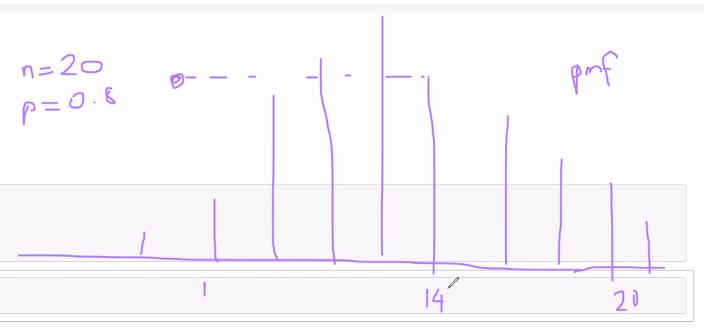

In [11]:
n = 20 
p = 0.8  # başarı oranı
x = 14  # istenen başarı

In [12]:
binomDist = stats.binom(n,p)
binomDist.pmf(14)

0.10909970097304983

In [14]:
stats.binom.pmf(x, n, p)

0.10909970097304983

b. at least 10 recover?

this is P(X≥10)=P(10)+P(11)+P(12)+...+P(20)

10'dan küçük olanları k=10 olanları bulmam gerek. Ama k=9 yaparsak 10'a kadar olanları alıp 1 den çıkaralım. :ünkü en az 10 hasta dediği için.
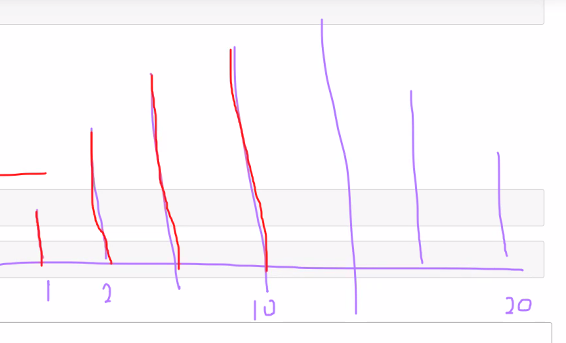

In [15]:
k = 9

In [16]:
1 - stats.binom.cdf(k, n, p)  # stats.binom.cdf(20,n,p) -stats.binom.cdf(k,n,p)

0.9994365863023398

tam olarak 9 hastanın iyileşme olasılığı için ise pmf kullanılır.

In [17]:
stats.binom.pmf(k, n, p)

0.000461684932503141

c. at least 14 but not more than 18 recover?

this is P(14≤X≤18)=P(14)+P(15)+...+P(18)

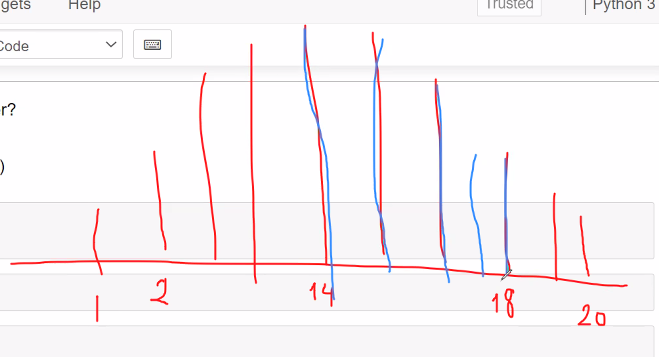

In [23]:
x1 = 14
x2 = 18

In [19]:
stats.binom.pmf(14, n, p)+stats.binom.pmf(15, n, p)+stats.binom.pmf(16, n, p)+stats.binom.pmf(17, n, p)+stats.binom.pmf(18, n, p)

0.8441321961561871

In [27]:
stats.binom.cdf(18, n, p)

0.9308247097235891

In [28]:
stats.binom.pmf(13, n, p)

0.0545498504865252

In [29]:
stats.binom.cdf(18, n, p) - stats.binom.pmf(13, n, p)

0.8762748592370639

In [26]:
stats.binom.cdf(x2, n, p) - stats.binom.pmf((x1-1), n, p)

0.8762748592370639

d. at most 16 recover?

this is P(X≤16)=1−P(X>16)=P(17)+P(18)+P(19)+P(20)

In [30]:
x = 16

In [32]:
stats.binom.cdf(x,n,p)

0.5885511380434305

e. Construct discrete probability distribution table and draw a graph

In [34]:
dist = []

for i in range(n+1):
    dist.append(stats.binom.pmf(i,n,p))
    print(str(i) + "\t" + str(stats.binom.pmf(i,n,p)))

0	1.048576000000001e-14
1	8.388607999999975e-13
2	3.187671040000001e-11
3	7.650410495999974e-10
4	1.3005697843199945e-08
5	1.6647293239295892e-07
6	1.664729323929588e-06
7	1.3317834591436803e-05
8	8.656592484433902e-05
9	0.000461684932503141
10	0.002031413703013826
11	0.007386958920050259
12	0.022160876760150803
13	0.0545498504865252
14	0.10909970097304983
15	0.17455952155687976
16	0.21819940194610007
17	0.2053641430080944
18	0.13690942867206304
19	0.05764607523034236
20	0.011529215046068481


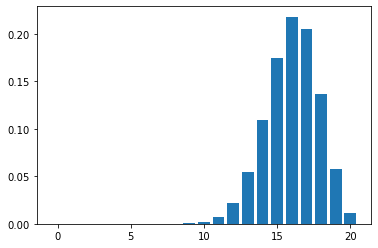

In [35]:
plt.bar(list(range(n+1)), dist);

## Question 2
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

Sınavın not ortalaması 78, varyansı 38 ve standart sapması doğal olarak 6 dır. Bu sındavdan 72 alma (> ve >= aynıdır) olasılığı?

In [44]:
mu = 78
sigma = np.sqrt(36)
x = 72

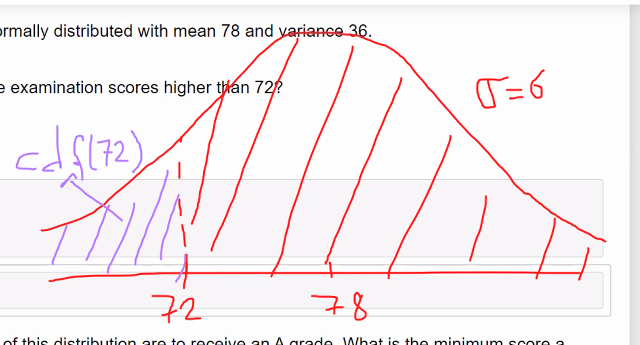

In [45]:
1 - stats.norm.cdf(x, mu, sigma)

0.8413447460685429

b. Suppose that students scoring in the top 10% of this distribution are to receive an A grade.
What is the minimum score a student must achieve to earn an A grade?

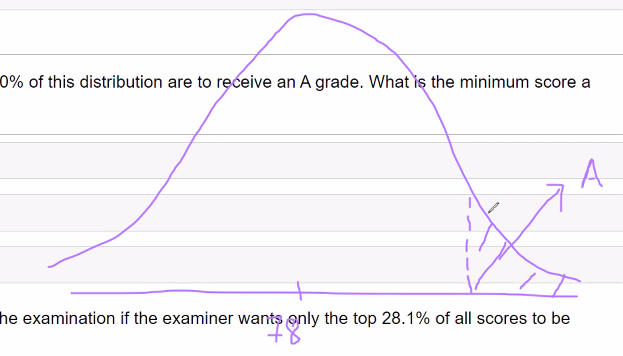

In [47]:
q = 1 - 0.1

In [48]:
stats.norm.ppf(q, mu, sigma)  # en az 85.7 alayım ki notum A olsun

85.6893093932676

In [50]:
a = stats.norm.ppf(q, mu, sigma)  # A almak için notu bulduk
stats.norm.cdf(a, mu, sigma)  # not'tan olasılığa gittik

0.9000000000000001

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [ ]:
q = 1 - 0.28

In [53]:
stats.norm.ppf(1-0.28, mu, sigma)

81.4970490436273

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

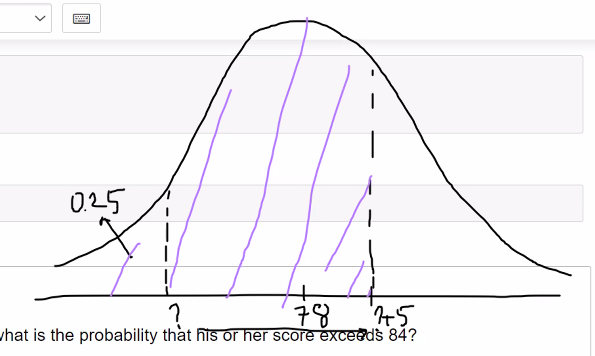

In [58]:
q1 = 0.25
x1 = stats.norm.ppf(q1, mu, sigma)  # --> ? ni bulduk.  
x1

73.95306149882352

In [63]:
x2 = stats.norm.cdf((x1+5), mu, sigma)  # --> ? % 5 i bulduk
x2

0.5631039448377338

In [64]:
1 - x2

0.43689605516226615

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

(1-cdf84) / (1-cdf72) mi ki

## Question 3
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

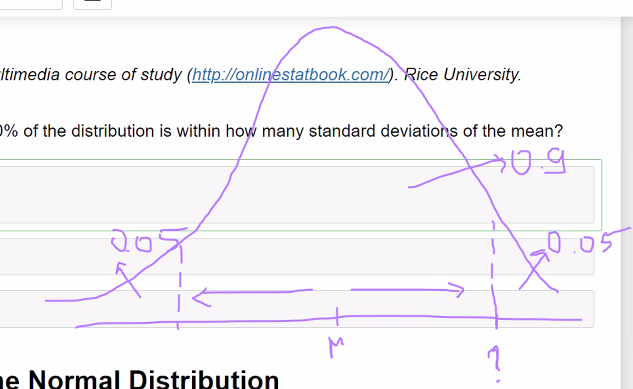

In [65]:
dof = 15
q = 0.95

In [66]:
stats.t.ppf(q, dof)

1.7530503556925547

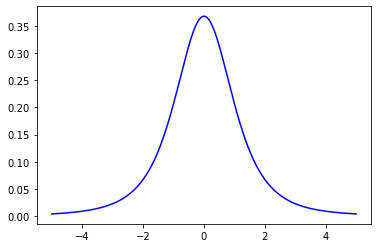

In [69]:
xs = np.linspace(-5, 5, 1000)
plt.plot(xs, stats.t.pdf(xs,3), 'b', label = 't-dist (df=3)');

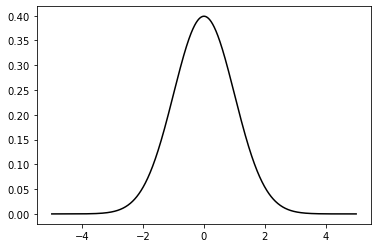

In [70]:
plt.plot(xs, stats.norm.pdf(xs), 'k', label = 'norm-dist');

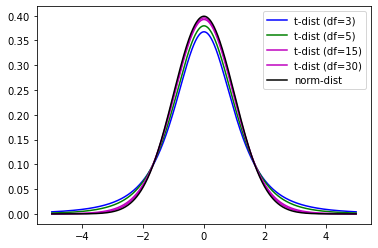

In [74]:
plt.plot(xs, stats.t.pdf(xs,3), "b", label = "t-dist (df=3)")
plt.plot(xs, stats.t.pdf(xs,5), "g", label = "t-dist (df=5)")
plt.plot(xs, stats.t.pdf(xs,15), "m", label = "t-dist (df=15)")
plt.plot(xs, stats.t.pdf(xs,30), "m", label = "t-dist (df=30)")
plt.plot(xs, stats.norm.pdf(xs), "k", label = "norm-dist")
plt.legend();

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [ ]:
import seaborn as sns

In [ ]:
sns.get_dataset_names()

1. Load "tips" dataset from Seaborn library

In [ ]:
tips = 

2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

3. Subset a dataframe just including Sunday tips

4. Calculate mean and std

5. Calculate standart error of the mean

In [ ]:
sem = 

6. Calculate the margin of error (95%)

In [ ]:
moe = 

7. Calculate the upper confidence limit

8. Calculate the lower confidence limit

9. Calculate 95% Confidence Interval around the mean by using scipy.stats